# The Sparks Foundation - GRIP (JULY 2022)

## 📖📚 Data Science and Business Anaytics 📜🖋

## <i>Task-1: Prediction using Supervised ML</i> 

### Author: [Reddy Kumaraswamy](https://github.com/reddykumaraswamy)


### <b> Problem Statement(s): </b>
#### <ul> <br> <li>Predict the percentage of a student based on the no. of study hours.</li> <br> <li>What will be predicted score if a student studies for 9.25 hrs/ day?</li> </ul>

### <b> Datasets Used: </b> [Download Here](http://bit.ly/w-data)


### <i> Importing all necessary libraries: </i>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from remote link
data_url = "http://bit.ly/w-data"

s_data = pd.read_csv(data_url)
print("Data imported successfully")

Data imported successfully


In [3]:
# check top 5 rows
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# check end 5 rows
s_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# view the shape i.e. number of rows, columns
s_data.shape

(25, 2)

In [6]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing the Data

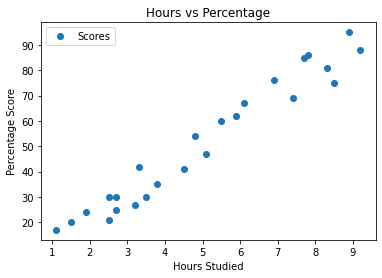

In [8]:
# Plotting the distribution of scores

s_data.plot(x = 'Hours', y = 'Scores', style = 'o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Text(0, 0.5, 'Percentage Score')

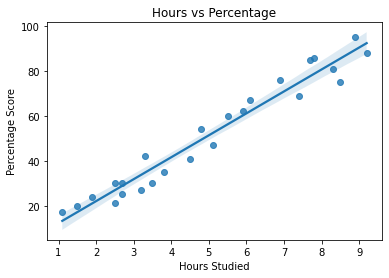

In [9]:
# regression plot gives a better and clear visualization for such data

sns.regplot(x = s_data['Hours'], y = s_data['Scores']);

plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

In [10]:
# Seprate features and taget

x = s_data[['Hours']]
y = s_data['Scores']

In [11]:
# Train - Test Split
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

## Model Building

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [13]:
## train the model

regressor.fit(train_x, train_y)

LinearRegression()

In [14]:
## prediction

pred_y = regressor.predict(val_x)

In [15]:
## view actual and predicted on test set side-by-side

pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


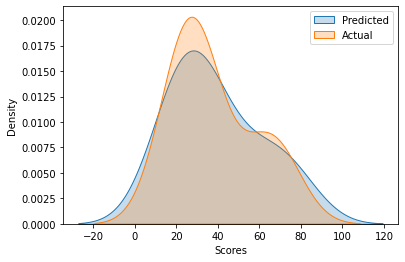

In [16]:
## Actual vs Predicted distribution plot 

sns.kdeplot(pred_y,label="Predicted", shade=True);

sns.kdeplot(data=val_y, label="Actual", shade=True);

plt.legend()

In [17]:
print('Train accuracy: ', regressor.score(train_x, train_y),'\nTest accuracy : ', regressor.score(val_x, val_y) )

Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365055


In [18]:
# Predict percent for custom input value for hours
# Q. What will be predicted score if a student studies for 9.25 hrs/ day? 

h = [[9.25]]
s = regressor.predict(h)
print('A student who studies ', h[0][0] , ' hours is estimated to score ', s[0])

A student who studies  9.25  hours is estimated to score  93.89272889341655
